In [1]:
#import dependencies
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from pathlib import Path
import warnings
warnings.filterwarnings('ignore')

In [2]:
 #Read the data as a CSV file
data1 = pd.read_csv(Path('project4data.csv'))
data1.head()

,"CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)","SUBSTR(P.PROGRAM_ID,6,2)","SUBSTR(I.EXIT_STATUS,1,10)","DECODE(SUBSTR(I.EXIT_STATUS,1,4),'TERM',0,'GRAD',1,'DISC',0,'COMP',1)",ACCEPTANCE_DATE,ARREST_DATE,REFERRAL_DATE,ACCEPTANCE_TYPE,EXIT_DATE,REFERRAL_SOURCE,...,DIAGNOSIS_REASON,DIAGNOSIS_LEVEL,EMP_ASSIST_TYPE,PRIMARY_DRUG_CHOICE,SECONDARY_DRUG_CHOICE,COUNT(DISTINCTSI.SANC_INCENT_ID),COUNT(DISTINCTT.TREATMENT_ID),COUNT(DISTINCTDT.DRUG_TEST_ID),COUNT(DISTINCTEA.EMP_ASSIST_ID),COUNT(DISTINCTJS_HEARING_ID)
0,01016FD1342018BDC00008,FD,Graduated,1,10/22/2018,10/17/2018,7/9/2018,post adjudication,7/6/2020,prosecutor,...,substance-induced/related,Primary,NaN,amphetamines/Meth(amphetamines),crack/cocaine,1,1,1,0,0
1,01016FD1342018BDC00008,FD,Graduated,1,10/22/2018,10/17/2018,7/9/2018,post adjudication,7/6/2020,prosecutor,...,substance-induced/related,NaN,NaN,amphetamines/Meth(amphetamines),crack/cocaine,0,0,21,0,1
2,01016FD1342018BDC00017,FD,Graduated,1,10/22/2018,8/8/2018,8/13/2018,probation revocation,11/9/2020,defense attorney,...,substance-induced/related,Primary,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,5,0,3
3,01016FD1342018BDC00019,FD,Graduated,1,11/5/2018,6/1/2018,9/5/2018,post adjudication,7/6/2020,defense attorney,...,substance-induced/related,Primary,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,0,0,0
4,01016FD1342018BDC00019,FD,Graduated,1,11/5/2018,6/1/2018,9/5/2018,post adjudication,7/6/2020,defense attorney,...,substance-induced/related,NaN,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),0,0,6,0,1


In [3]:
#Convert Data objects to Datetime variables 
data1['ACCEPTANCE_DATE'] = pd.to_datetime(data1['ACCEPTANCE_DATE'])

data1['ARREST_DATE'] = pd.to_datetime(data1['ARREST_DATE'])

data1['REFERRAL_DATE'] = pd.to_datetime(data1['REFERRAL_DATE'])
data1['EXIT_DATE'] = pd.to_datetime(data1['EXIT_DATE'])
data1['DOB'] = pd.to_datetime(data1['DOB'])

In [4]:
data1['GENDER'].value_counts()

male           2939
female         1467
transgender       4
Name: GENDER, dtype: int64

In [5]:
 #obtain Age from Date of Birth
# import datetime as dt

now = pd.to_datetime('now')

data1['age'] = (now - data1['DOB']).dt.total_seconds() / (60*60*24*365.25)
data1['age'].describe()

count    4410.000000
mean       38.766019
std        11.703869
min         1.540901
25%        30.314343
50%        37.094631
75%        46.176082
max        81.105582
Name: age, dtype: float64

In [6]:
#Calculate difference in days between arrest to acceptance

data1['time_arrest_accept'] = (data1['ACCEPTANCE_DATE'] - data1['ARREST_DATE']).astype('timedelta64[D]').astype('float')

#data1['time_arrest_accept'] = data1['time_arrest_accept'].dt.day

data1['time_arrest_accept'].describe()

count     4341.000000
mean       243.307533
std        416.190510
min      -7670.000000
25%         58.000000
50%        126.000000
75%        307.000000
max      10141.000000
Name: time_arrest_accept, dtype: float64

In [7]:
#Filter data based on reasonable age and differences between arrest dates and program acceptance
person_data = data1[(data1.age > 15) & (data1.time_arrest_accept > 0)]
person_data.head()

,"CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)","SUBSTR(P.PROGRAM_ID,6,2)","SUBSTR(I.EXIT_STATUS,1,10)","DECODE(SUBSTR(I.EXIT_STATUS,1,4),'TERM',0,'GRAD',1,'DISC',0,'COMP',1)",ACCEPTANCE_DATE,ARREST_DATE,REFERRAL_DATE,ACCEPTANCE_TYPE,EXIT_DATE,REFERRAL_SOURCE,...,EMP_ASSIST_TYPE,PRIMARY_DRUG_CHOICE,SECONDARY_DRUG_CHOICE,COUNT(DISTINCTSI.SANC_INCENT_ID),COUNT(DISTINCTT.TREATMENT_ID),COUNT(DISTINCTDT.DRUG_TEST_ID),COUNT(DISTINCTEA.EMP_ASSIST_ID),COUNT(DISTINCTJS_HEARING_ID),age,time_arrest_accept
0,01016FD1342018BDC00008,FD,Graduated,1,2018-10-22,2018-10-17,2018-07-09,post adjudication,2020-07-06,prosecutor,...,NaN,amphetamines/Meth(amphetamines),crack/cocaine,1,1,1,0,0,35.473823,5.0
1,01016FD1342018BDC00008,FD,Graduated,1,2018-10-22,2018-10-17,2018-07-09,post adjudication,2020-07-06,prosecutor,...,NaN,amphetamines/Meth(amphetamines),crack/cocaine,0,0,21,0,1,35.473823,5.0
2,01016FD1342018BDC00017,FD,Graduated,1,2018-10-22,2018-08-08,2018-08-13,probation revocation,2020-11-09,defense attorney,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,5,0,3,32.922146,75.0
3,01016FD1342018BDC00019,FD,Graduated,1,2018-11-05,2018-06-01,2018-09-05,post adjudication,2020-07-06,defense attorney,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,0,0,0,32.514207,157.0
4,01016FD1342018BDC00019,FD,Graduated,1,2018-11-05,2018-06-01,2018-09-05,post adjudication,2020-07-06,defense attorney,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),0,0,6,0,1,32.514207,157.0


In [8]:
#Rename Variables
person_data = person_data.rename(columns={"DECODE(SUBSTR(I.EXIT_STATUS,1,4),'TERM',0,'GRAD',1,'DISC',0,'COMP',1)": 'GRADUATED',
                                          "SUBSTR(I.EXIT_STATUS,1,10)": 'EXIT_STATUS',
                              "CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)": 'PARTICIPANT_ID', 
                              'SUBSTR(P.PROGRAM_ID,6,2)': 'PROGRAM_TYPE',
                              'COUNT(DISTINCTSI.SANC_INCENT_ID)': 'No_SANC_INCENT',
                              'COUNT(DISTINCTT.TREATMENT_ID)': 'No_TREATMENTS',
                              'COUNT(DISTINCTDT.DRUG_TEST_ID)': 'No_DRUG_TEST',
                              'COUNT(DISTINCTEA.EMP_ASSIST_ID)': 'No_EMP_ASSIST',
                              'COUNT(DISTINCTJS_HEARING_ID)': 'No_HEARING',
                              'age': 'AGE',
                              'time_arrest_accept': 'DAYS_TO_ACCEPTANCE'
                              })
person_data.head()

,PARTICIPANT_ID,PROGRAM_TYPE,EXIT_STATUS,GRADUATED,ACCEPTANCE_DATE,ARREST_DATE,REFERRAL_DATE,ACCEPTANCE_TYPE,EXIT_DATE,REFERRAL_SOURCE,...,EMP_ASSIST_TYPE,PRIMARY_DRUG_CHOICE,SECONDARY_DRUG_CHOICE,No_SANC_INCENT,No_TREATMENTS,No_DRUG_TEST,No_EMP_ASSIST,No_HEARING,AGE,DAYS_TO_ACCEPTANCE
0,01016FD1342018BDC00008,FD,Graduated,1,2018-10-22,2018-10-17,2018-07-09,post adjudication,2020-07-06,prosecutor,...,NaN,amphetamines/Meth(amphetamines),crack/cocaine,1,1,1,0,0,35.473823,5.0
1,01016FD1342018BDC00008,FD,Graduated,1,2018-10-22,2018-10-17,2018-07-09,post adjudication,2020-07-06,prosecutor,...,NaN,amphetamines/Meth(amphetamines),crack/cocaine,0,0,21,0,1,35.473823,5.0
2,01016FD1342018BDC00017,FD,Graduated,1,2018-10-22,2018-08-08,2018-08-13,probation revocation,2020-11-09,defense attorney,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,5,0,3,32.922146,75.0
3,01016FD1342018BDC00019,FD,Graduated,1,2018-11-05,2018-06-01,2018-09-05,post adjudication,2020-07-06,defense attorney,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),1,1,0,0,0,32.514207,157.0
4,01016FD1342018BDC00019,FD,Graduated,1,2018-11-05,2018-06-01,2018-09-05,post adjudication,2020-07-06,defense attorney,...,NaN,marijuana/cannabinoids,amphetamines/Meth(amphetamines),0,0,6,0,1,32.514207,157.0


In [9]:
 #Read the data as a CSV file
EMPLOY_ED = pd.read_csv(Path('emp_educ_income_risk.csv'))
EMPLOY_ED.head()

,"CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)",EDUCATION_LEVEL,EMP_STATUS,INCOME_LEVEL,RESIDENCE_COUNTY,RISK_LEVEL
0,01034MH147f08b22e5-b058-447b-b358-2b6040d12a4f,some high,unemployed,No income,Ware,NaN
1,06038VC1169288402d-c5ad-4eb8-ae24-48ee2f0c6a8a,some college,full-time,"$25,000-$34,999",Carroll,low
2,10107FT1027dded030-86bf-49e7-91eb-7a8a2af8a111,high school/GED,full-time,"$15,000-$19,999",Newton,low
3,04044FD142f288ab8d-5d6e-4bb8-a365-5f527adb6e84,some college,disability,"$10,000-$14,999",DeKalb,NaN
4,02037FD101727fe12d-2089-4041-87ed-918e818d0c13,middle,unemployed,No income,Berrien,NaN


In [10]:
#load in employment and education data
EMPLOY_ED = EMPLOY_ED.rename(columns={"CONCAT(P.PROGRAM_ID,P.PROGRAM_PARTICIPANT_ID)":'PARTICIPANT_ID'})
EMPLOY_ED.head()

,PARTICIPANT_ID,EDUCATION_LEVEL,EMP_STATUS,INCOME_LEVEL,RESIDENCE_COUNTY,RISK_LEVEL
0,01034MH147f08b22e5-b058-447b-b358-2b6040d12a4f,some high,unemployed,No income,Ware,NaN
1,06038VC1169288402d-c5ad-4eb8-ae24-48ee2f0c6a8a,some college,full-time,"$25,000-$34,999",Carroll,low
2,10107FT1027dded030-86bf-49e7-91eb-7a8a2af8a111,high school/GED,full-time,"$15,000-$19,999",Newton,low
3,04044FD142f288ab8d-5d6e-4bb8-a365-5f527adb6e84,some college,disability,"$10,000-$14,999",DeKalb,NaN
4,02037FD101727fe12d-2089-4041-87ed-918e818d0c13,middle,unemployed,No income,Berrien,NaN


In [11]:
#join the employment with the court and treatment data
joined = person_data.merge(EMPLOY_ED, on='PARTICIPANT_ID', how='inner')
#joined['PRIMARY_DRUG_CHOICE'].value_counts()
#joined.to_csv('joined_df.csv', index=False)

In [12]:
joined['GENDER'].value_counts()

male           2790
female         1303
transgender       3
Name: GENDER, dtype: int64

In [11]:
#Recode Race
RACE2=['white', 'black/African American', 'Hispanic/Latino','two or more/mixed', 'Asian', 'American Indian', 'other', 'middle eastern or north African', 'Pacific Islander or native Hawaiian']
R_CAT=['White', 'Black', 'Hispanic', 'Other', 'Other','Other','Other','Other','Other']

joined['RACE_CAT'] = joined['RACE'].replace(RACE2, R_CAT)
joined['RACE_CAT'].value_counts()

White       2640
Black       1233
Hispanic     146
Other         77
Name: RACE_CAT, dtype: int64

In [12]:
#Recode Primary Drug
P_Drug =['amphetamines/Meth(amphetamines)',
'alcohol'     ,
'marijuana/cannabinoids'  ,
'crack/cocaine'   ,
'heroin'   ,
'prescription narcotics' ,
'none' ,
'benzodiazepines',
'other'  ,
'prescription opioids',
'ecstasy/MDMA',
'other prescriptions',
'Synthetic Cannabinoids',
'hallucinogens']
D_Cat = ['amphetamines/Meth(amphetamines)',
'alcohol',
'marijuana/cannabinoids',
'crack/cocaine',
'heroin',
'prescription drugs',
'none',
'prescription drugs',
'Other'  ,
'prescription drugs',
'Other',
'prescription drugs',
'Other',
'Other']
joined['P_DRUG_CAT'] = joined['PRIMARY_DRUG_CHOICE'].replace(P_Drug, D_Cat)
joined['P_DRUG_CAT'].value_counts()

amphetamines/Meth(amphetamines)    1232
alcohol                            1126
marijuana/cannabinoids              669
crack/cocaine                       334
prescription drugs                  277
heroin                              245
none                                152
Other                                54
Name: P_DRUG_CAT, dtype: int64

In [13]:
#Recode Secondary Drug
S_Drug =['none','marijuana/cannabinoids','alcohol','amphetamines/Meth(amphetamines)',
'crack/cocaine','prescription narcotics','other','heroin', 'benzodiazepines',
'prescription opioids','other prescriptions',
'ecstasy/MDMA','Synthetic Cannabinoids', 'inhalants',
'hallucinogens']
D2_Cat = ['none','marijuana/cannabinoids','alcohol','amphetamines/Meth(amphetamines)',
'crack/cocaine','prescription drugs', 'Other', 'heroin','prescription drugs','prescription drugs',
'prescription drugs','Other','Other','Other','Other']
joined['S_DRUG_CAT'] = joined['SECONDARY_DRUG_CHOICE'].replace(S_Drug, D2_Cat)
joined['S_DRUG_CAT'].value_counts()

none                               1406
marijuana/cannabinoids              917
alcohol                             501
amphetamines/Meth(amphetamines)     441
prescription drugs                  369
crack/cocaine                       244
Other                               125
heroin                               86
Name: S_DRUG_CAT, dtype: int64

In [14]:
#Frequency for education level
joined['EDUCATION_LEVEL'].value_counts()

high school/GED                    1997
some high                          1034
some college                        525
middle                              146
bachelors degree                    143
associates degree                   134
professional or graduate degree      76
elementary                           27
Name: EDUCATION_LEVEL, dtype: int64

In [15]:
#Recode Education
sch = ['high school/GED','some high','some college','bachelors degree','middle',
'associates degree','professional or graduate degree','elementary']
sch_cat = ['HS or less', 'HS or less', 'some college','college grad or more','HS or less',
          'some college', 'college grad or more', 'HS or less']
joined['EDUC_CAT'] = joined['EDUCATION_LEVEL'].replace(sch, sch_cat)
joined['EDUC_CAT'].value_counts()

HS or less              3204
some college             659
college grad or more     219
Name: EDUC_CAT, dtype: int64

In [16]:
#Frequency for employment status
joined['EMP_STATUS'].value_counts()

unemployed                      1824
full-time                       1408
part-time more than 20 hours     410
disability                       225
part-time less than 20 hours     145
student/training                  69
vocational rehab                  15
Name: EMP_STATUS, dtype: int64

In [17]:
#Recode Employment
job = ['unemployed','full-time','part-time more than 20 hours','disability',
'part-time less than 20 hours','student/training','vocational rehab']
job_cat = ['unemployed', 'full-time', 'part-time','disability','part-time',
          'part-time', 'disability']
joined['EMPLOY_CAT'] = joined['EMP_STATUS'].replace(job, job_cat)
joined['EMPLOY_CAT'].value_counts()

unemployed    1824
full-time     1408
part-time      624
disability     240
Name: EMPLOY_CAT, dtype: int64

In [18]:
joined['PROGRAM_TYPE'].value_counts()
#Recode Employment
abv = ['FD','DC','MH','VC','FT','JD','JM','MM']

name_cat = ['Felony Drug', 'DUI Courts', 'Mental Health','Veterans Court','Family Treatment',
          'Juvenile Drug', 'Mental Health', 'Mental Health']
joined['PROGRAM_TYPE'] = joined['PROGRAM_TYPE'].replace(abv, name_cat)
joined['PROGRAM_TYPE'].value_counts()

Felony Drug         2000
DUI Courts           923
Mental Health        688
Veterans Court       195
Family Treatment     184
Juvenile Drug        106
Name: PROGRAM_TYPE, dtype: int64

In [19]:
#Recode Employment
disorder = ['Substance Use Disorder',
'Anxiety Disorders',
'Bipolar Disorders',
'Depressive Disorders',
'Schizophrenia Spectrum and Other Psychotic Disorders',
'Trauma/Stress-Related Disorders',
'Obsessive-Compulsive Disorders',
'Somatic Symptom and Related Disorders',
'Neurocognitive Development Disorders',
'Neurodevelopmental Disorders',
'Neurocognitive Disorders',
'Dissociative Disorders']

dis = ['Substance Use Disorder',
'Mood Disorders',
'Mood Disorders',
'Mood Disorders',
'Schizophrenia Spectrum and Other Psychotic Disorders',
'Mood Disorders',
'Mood Disorders',
'Mood Disorders',
'Neurocognitive Disorders',
'Neurocognitive Disorders',
'Neurocognitive Disorders',
'Schizophrenia Spectrum and Other Psychotic Disorders']

joined['DIAGNOSIS'] = joined['DIAGNOSIS'].replace(disorder, dis)
joined['DIAGNOSIS'].value_counts()

Substance Use Disorder                                  2826
Mood Disorders                                           591
Schizophrenia Spectrum and Other Psychotic Disorders     122
Neurocognitive Disorders                                  13
Name: DIAGNOSIS, dtype: int64

In [ ]:
joined.head()

In [21]:
joined['RISK_LEVEL'].value_counts()

high                   1734
moderate               1067
low                     618
very high               130
very low                 56
high risk/high need       6
low risk/low need         1
Name: RISK_LEVEL, dtype: int64

In [20]:
#Recode Employment
old = ['high','moderate','low','very high','very low','high risk/high need','low risk/low need']

new = ['high', 'moderate', 'low','high','low',
          'high', 'low']
joined['RISK_LEVEL3'] = joined['RISK_LEVEL'].replace(old, new)
joined['RISK_LEVEL3'].value_counts()

high        1870
moderate    1067
low          675
Name: RISK_LEVEL3, dtype: int64

In [ ]:
joined.isna().sum()

In [21]:
#Recode Employment
old = ['Graduated','Terminated','Discharged','Completed']

new = ['Graduated', 'Terminated/Discharged', 'Terminated/Discharged','Graduated']
joined['GRADUATED2'] = joined['EXIT_STATUS'].replace(old, new)
joined['GRADUATED2'].value_counts()



Graduated                2534
Terminated/Discharged    1562
Name: GRADUATED2, dtype: int64

In [22]:
#Recode Employment
old = ['No income','$20,000-$24,999','$15,000-$19,999','$25,000-$34,999',
      '$10,000-$14,999', '$5,000-$9,999', '$35,000-$44,999','Under $999',
      '$1,000-$4,999','$45,000-$54,999','$75,000 or higher', '$55,000-$64,999',
      '$65,000-$74,999']

new = ['No income','20K to 34K','10k to 20K','20K to 34K',
      '10k to 20K', '0K to 10K', '35K to 44K','0K to 10K',
      '0K to 10K','45K to 64K','65K and higher', '45K to 64K',
      '65K and higher']
joined['INCOME_CAT'] = joined['INCOME_LEVEL'].replace(old, new)
joined['INCOME_CAT'].value_counts()

No income         1857
20K to 34K         742
10k to 20K         692
0K to 10K          386
35K to 44K         179
45K to 64K         117
65K and higher      92
Name: INCOME_CAT, dtype: int64

In [25]:
joined.isnull().sum()
#joined.to_csv('final_df.csv', index=False)
#joined['DIAGNOSIS_REASON'].value_counts()


PARTICIPANT_ID              0
PROGRAM_TYPE                0
EXIT_STATUS                 0
GRADUATED                   0
ACCEPTANCE_DATE             0
ARREST_DATE                 0
REFERRAL_DATE              87
ACCEPTANCE_TYPE             2
EXIT_DATE                   0
REFERRAL_SOURCE            55
DOB                         0
GENDER                      0
RACE                        0
EMP_UNSTABLE_CHRONIC        0
DIAGNOSIS                 544
DIAGNOSIS_REASON          544
DIAGNOSIS_LEVEL           617
EMP_ASSIST_TYPE          4091
PRIMARY_DRUG_CHOICE         7
SECONDARY_DRUG_CHOICE       7
No_SANC_INCENT              0
No_TREATMENTS               0
No_DRUG_TEST                0
No_EMP_ASSIST               0
No_HEARING                  0
AGE                         0
DAYS_TO_ACCEPTANCE          0
EDUCATION_LEVEL            14
EMP_STATUS                  0
INCOME_LEVEL               31
RESIDENCE_COUNTY           11
RISK_LEVEL                484
RACE_CAT                    0
P_DRUG_CAT

In [23]:
#drop irrelevant variables
#county was dropped was it wasn't relevant in prior models
joined2 = joined.drop(['PARTICIPANT_ID', 'ACCEPTANCE_DATE','ARREST_DATE', 'EXIT_DATE', 'REFERRAL_DATE', 'DOB', 'SECONDARY_DRUG_CHOICE',
                     'PRIMARY_DRUG_CHOICE', 'RACE', 'EDUCATION_LEVEL','REFERRAL_SOURCE', 'EMP_STATUS', 'RESIDENCE_COUNTY',
                      'RISK_LEVEL','EXIT_STATUS', 'INCOME_LEVEL','EMP_ASSIST_TYPE', 'GRADUATED','RISK_LEVEL',               
                      ], axis=1)

joined2.dtypes

PROGRAM_TYPE             object
ACCEPTANCE_TYPE          object
GENDER                   object
EMP_UNSTABLE_CHRONIC     object
DIAGNOSIS                object
DIAGNOSIS_REASON         object
DIAGNOSIS_LEVEL          object
No_SANC_INCENT            int64
No_TREATMENTS             int64
No_DRUG_TEST              int64
No_EMP_ASSIST             int64
No_HEARING                int64
AGE                     float64
DAYS_TO_ACCEPTANCE      float64
RACE_CAT                 object
P_DRUG_CAT               object
S_DRUG_CAT               object
EDUC_CAT                 object
EMPLOY_CAT               object
RISK_LEVEL3              object
GRADUATED2               object
INCOME_CAT               object
dtype: object

In [27]:
#Save joined file to CSV
joined.to_csv('final_df.csv', index=False)

In [28]:
#create features

X = pd.get_dummies(joined2, columns= ['PROGRAM_TYPE', 'ACCEPTANCE_TYPE', 'DIAGNOSIS', 'GENDER','RACE_CAT','EMP_UNSTABLE_CHRONIC',
'DIAGNOSIS_REASON','DIAGNOSIS','DIAGNOSIS_LEVEL','P_DRUG_CAT', 'S_DRUG_CAT', 'EDUC_CAT', 'EMPLOY_CAT', 
'INCOME_CAT', 'RISK_LEVEL3']).drop('GRADUATED2',axis=1)

y = joined2['GRADUATED2']

In [29]:
#shape of the independent variables
print(X.shape)
#shape of the outcome variable
print(y.shape)

(4096, 74)
(4096,)


In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, stratify=y)


In [31]:
# explore the number of selected features for RFE
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt

In [32]:
#Examine number of features ranging from 5 to 20
def get_models():
    models = dict()
    for i in range(5, 20):
        rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=i)
        model = RandomForestClassifier()
        models[str(i)] = Pipeline(steps=[('s',rfe),('m',model)])
    return models

In [33]:
#Here we will use cross-validation to evaluate the model
def evaluate_model(model, X_train, y_train):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=22)
    scores = cross_val_score(model, X_train, y_train, 
                             scoring='accuracy', 
                             cv=cv, 
                             n_jobs=1,
                            error_score='raise')
    return scores    

>5 0.751 (0.013)
>6 0.764 (0.012)
>7 0.770 (0.013)
>8 0.781 (0.015)
>9 0.782 (0.017)
>10 0.782 (0.014)
>11 0.780 (0.013)
>12 0.789 (0.013)
>13 0.794 (0.016)
>14 0.795 (0.012)
>15 0.792 (0.012)
>16 0.798 (0.018)
>17 0.798 (0.013)
>18 0.798 (0.015)
>19 0.799 (0.012)


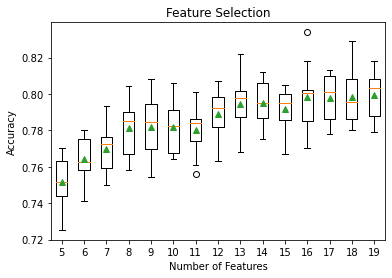

In [34]:
#define the data
models= get_models()
#evaluate the models and store results
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X, y)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Accuracy')
plt.xlabel('Number of Features')
plt.title('Feature Selection')
plt.show()


>lr 0.664 (0.011)
>xtree 0.774 (0.014)
>ada 0.775 (0.012)
>rf 0.779 (0.016)
>gbm 0.781 (0.012)


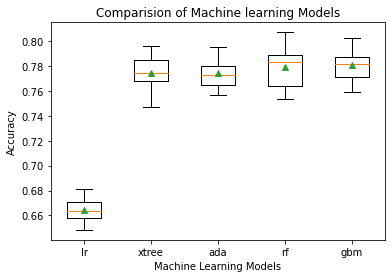

In [35]:
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.pipeline import Pipeline
from matplotlib import pyplot as plt
 
# get a list of models to evaluate
def get_models():
    models = dict()
    # lr
    rfe = RFE(estimator=LogisticRegression(), n_features_to_select=8)
    model = RandomForestClassifier()
    models['lr'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Extra Random Trees
    rfe = RFE(estimator=ExtraTreesClassifier(), n_features_to_select=8)
    model = RandomForestClassifier()
    models['xtree'] = Pipeline(steps=[('s',rfe),('m',model)])
    # Adaboost
    rfe = RFE(estimator=AdaBoostClassifier(), n_features_to_select=8)
    model = RandomForestClassifier()
    models['ada'] = Pipeline(steps=[('s',rfe),('m',model)])
    # rf
    rfe = RFE(estimator=RandomForestClassifier(), n_features_to_select=8)
    model = RandomForestClassifier()
    models['rf'] = Pipeline(steps=[('s',rfe),('m',model)])
    # gbm
    rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=8)
    model = RandomForestClassifier()
    models['gbm'] = Pipeline(steps=[('s',rfe),('m',model)])
    return models
 
# evaluate a give model using cross-validation
def evaluate_model(model, X, y):
    cv = RepeatedStratifiedKFold(n_splits=5, n_repeats=2, random_state=22)
    scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1)
    return scores
 
# define dataset
#X, y = get_dataset(X_train, y_train)
# get the models to evaluate
models = get_models()
# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
    scores = evaluate_model(model, X, y)
    results.append(scores)
    names.append(name)
    print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
plt.boxplot(results, labels=names, showmeans=True)
plt.ylabel('Accuracy')
plt.xlabel('Machine Learning Models')
plt.title('Comparision of Machine learning Models')
plt.show()

In [36]:
# define RFE
rfe = RFE(estimator=GradientBoostingClassifier(), n_features_to_select=8)
# fit RFE
rfe.fit(X, y)
# summarize all features
for i in range(X.shape[1]):
	print('Column: %d, Selected %s, Rank: %.3f' % (i, rfe.support_[i], rfe.ranking_[i]))

Column: 0, Selected True, Rank: 1.000
Column: 1, Selected True, Rank: 1.000
Column: 2, Selected True, Rank: 1.000
Column: 3, Selected False, Rank: 55.000
Column: 4, Selected True, Rank: 1.000
Column: 5, Selected True, Rank: 1.000
Column: 6, Selected True, Rank: 1.000
Column: 7, Selected True, Rank: 1.000
Column: 8, Selected False, Rank: 58.000
Column: 9, Selected False, Rank: 11.000
Column: 10, Selected False, Rank: 12.000
Column: 11, Selected False, Rank: 24.000
Column: 12, Selected False, Rank: 36.000
Column: 13, Selected False, Rank: 9.000
Column: 14, Selected False, Rank: 16.000
Column: 15, Selected False, Rank: 47.000
Column: 16, Selected False, Rank: 28.000
Column: 17, Selected False, Rank: 43.000
Column: 18, Selected False, Rank: 46.000
Column: 19, Selected False, Rank: 33.000
Column: 20, Selected False, Rank: 20.000
Column: 21, Selected False, Rank: 18.000
Column: 22, Selected False, Rank: 38.000
Column: 23, Selected False, Rank: 44.000
Column: 24, Selected False, Rank: 5.000
C

In [37]:
X.head()

,No_SANC_INCENT,No_TREATMENTS,No_DRUG_TEST,No_EMP_ASSIST,No_HEARING,AGE,DAYS_TO_ACCEPTANCE,PROGRAM_TYPE_DUI Courts,PROGRAM_TYPE_Family Treatment,PROGRAM_TYPE_Felony Drug,...,INCOME_CAT_0K to 10K,INCOME_CAT_10k to 20K,INCOME_CAT_20K to 34K,INCOME_CAT_35K to 44K,INCOME_CAT_45K to 64K,INCOME_CAT_65K and higher,INCOME_CAT_No income,RISK_LEVEL3_high,RISK_LEVEL3_low,RISK_LEVEL3_moderate
0,1,1,1,0,0,35.466518,5.0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
1,0,0,21,0,1,35.466518,5.0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
2,1,1,5,0,3,32.914841,75.0,0,0,1,...,0,0,0,0,0,0,1,0,0,1
3,1,1,0,0,0,32.506902,157.0,0,0,1,...,0,0,0,0,0,0,1,1,0,0
4,0,0,6,0,1,32.506902,157.0,0,0,1,...,0,0,0,0,0,0,1,1,0,0


In [25]:
#create a seperate dataframe with the selected variables
new = joined[['No_SANC_INCENT',
'No_TREATMENTS',
'No_DRUG_TEST',
'No_HEARING',
 'AGE',             
'DAYS_TO_ACCEPTANCE',
'PROGRAM_TYPE','RISK_LEVEL3','GRADUATED2']]
new.head()


#Save joined file to CSV
new.to_csv('ml_df.csv', index=False)


In [31]:
#create features

X = pd.get_dummies(new, columns= ['PROGRAM_TYPE', 'RISK_LEVEL3']).drop('GRADUATED2',axis=1)

y = new['GRADUATED2']

X = X.drop(['PROGRAM_TYPE_Family Treatment', 'PROGRAM_TYPE_Felony Drug','PROGRAM_TYPE_Juvenile Drug',
            'PROGRAM_TYPE_Mental Health', 'PROGRAM_TYPE_Veterans Court', 'RISK_LEVEL3_low',
            'RISK_LEVEL3_moderate'           
                      ], axis=1)
X.head()

,No_SANC_INCENT,No_TREATMENTS,No_DRUG_TEST,No_HEARING,AGE,DAYS_TO_ACCEPTANCE,PROGRAM_TYPE_DUI Courts,RISK_LEVEL3_high
0,1,1,1,0,35.468831,5.0,0,1
1,0,0,21,1,35.468831,5.0,0,1
2,1,1,5,3,32.917154,75.0,0,0
3,1,1,0,0,32.509214,157.0,0,1
4,0,0,6,1,32.509214,157.0,0,1


In [32]:
y.value_counts()

Graduated                2534
Terminated/Discharged    1562
Name: GRADUATED2, dtype: int64

In [33]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=23, stratify=y)

In [47]:
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
import pickle
#fit the model to the training set
gbm_model = GradientBoostingClassifier(random_state=42)
#Train our model using the training data: output training and testing scores



from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 40)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [3, 4, 5, 6, 7, 8]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 3, 4, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4, 5]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf}



# # save the model to disk
# filename = 'finalized_model.sav'
# pickle.dump(model, open(filename, 'wb'))

# y_pred = rf_model.predict(X_test_scaled)
# print(f'*****************RANDOM FOREST MODEL*******************')
# print(classification_report_imbalanced(y_test, y_pred))
# # rf_model.score(X_train_scaled, y_train)
# # rf_model.score(X_test_scaled, y_test)
# print(f'Training Score: {rf_model.score(X_train_scaled, y_train)}')
# print(f'Testing Score: {rf_model.score(X_test_scaled, y_test)}')

In [48]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
gbm = GradientBoostingClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
gbm_search = RandomizedSearchCV(estimator = gbm, param_distributions = random_grid, n_iter = 40, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
gbm_search.fit(X_train, y_train)
gbm_search.best_params_

Fitting 3 folds for each of 40 candidates, totalling 120 fits


{'n_estimators': 423,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 4}

In [49]:
from imblearn.metrics import classification_report_imbalanced
from sklearn import model_selection
from sklearn.ensemble import GradientBoostingClassifier
import pickle
#fit the model to the training set
gbm_model = GradientBoostingClassifier(random_state=42,n_estimators=423,
              min_samples_split=5,
              min_samples_leaf=2,
              max_features='sqrt',
              max_depth=4
              )

gbm_model.fit(X_train, y_train)
# save the model to disk
filename = 'finalized_model.pkl'
pickle.dump(gbm_model, open(filename, 'wb'))

#Print Classification Report and Accuracy
y_pred = gbm_model.predict(X_test)
print(f'*****************************RANDOM FOREST MODEL************************************')
print(classification_report_imbalanced(y_test, y_pred))
# rf_model.score(X_train_scaled, y_train)
# rf_model.score(X_test_scaled, y_test)
print(f'Training Score: {gbm_model.score(X_train, y_train)}')
print(f'Testing Score: {gbm_model.score(X_test, y_test)}')

*****************************RANDOM FOREST MODEL************************************
                             pre       rec       spe        f1       geo       iba       sup

            Graduated       0.80      0.85      0.64      0.82      0.74      0.56       633
Terminated/Discharged       0.73      0.64      0.85      0.68      0.74      0.54       391

          avg / total       0.77      0.77      0.72      0.77      0.74      0.55      1024

Training Score: 0.9134114583333334
Testing Score: 0.7734375
